In [336]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

import warnings
warnings.filterwarnings('ignore')

## **Model Testing**

# **Univariate Forecasting**

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
os.mkdir('data')#copy the csv files inside of it

In [ ]:
bogra_train_df = pd.read_csv("data/bogra_train.csv")
bogra_train_df['datetime'] = pd.to_datetime(bogra_train_df['datetime'])
bogra_train_df.set_index('datetime', inplace=True)

bogra_val_df= pd.read_csv("data/bogra_val.csv")
bogra_val_df['datetime'] = pd.to_datetime(bogra_val_df['datetime'])
bogra_val_df.set_index('datetime', inplace=True)

bogra_test_df = pd.read_csv('data/bogra_test.csv',index_col=['datetime'],parse_dates=True)

In [ ]:
column_name='river_discharge'
bogra_train_df = bogra_train_df[[column_name] + [col for col in bogra_train_df.columns if col != column_name]]
bogra_val_df = bogra_val_df[[column_name] + [col for col in bogra_val_df.columns if col != column_name]]
bogra_test_df = bogra_test_df[[column_name] + [col for col in bogra_test_df.columns if col != column_name]]

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X_train, y_train = df_to_X_y(bogra_train_df[['river_discharge']], WINDOW_SIZE)
X_val, y_val = df_to_X_y(bogra_val_df[['river_discharge']], WINDOW_SIZE)
X_test, y_test = df_to_X_y(bogra_test_df[['river_discharge']], WINDOW_SIZE)

X_train.shape, y_train.shape,X_val.shape, y_val.shape,X_test.shape, y_test.shape

((1717, 5, 1, 1),
 (1717, 1),
 (487, 5, 1, 1),
 (487, 1),
 (241, 5, 1, 1),
 (241, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))#tried LSTM & GRU and used the best one here LSTM gave better RMSE
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                16896     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
54/54 [==============================] - 9s 109ms/step - loss: 0.0677 - root_mean_squared_error: 0.2602 - val_loss: 0.0824 - val_root_mean_squared_error: 0.2871
Epoch 2/10
54/54 [==============================] - 5s 86ms/step - loss: 0.0579 - root_mean_squared_error: 0.2407 - val_loss: 0.0706 - val_root_mean_squared_error: 0.2657
Epoch 3/10
54/54 [==============================] - 8s 145ms/step - loss: 0.0482 - root_mean_squared_error: 0.2196 - val_loss: 0.0573 - val_root_mean_squared_error: 0.2393
Epoch 4/10
54/54 [==============================] - 7s 135ms/step - loss: 0.0374 - root_mean_squared_error: 0.1933 - val_loss: 0.0414 - val_root_mean_squared_error: 0.2036
Epoch 5/10
54/54 [==============================] - 4s 80ms/step - loss: 0.0255 - root_mean_squared_error: 0.1596 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1592
Epoch 6/10
54/54 [==============================] - 5s 93ms/step - loss: 0.0157 - root_mean_squared_error: 0.1253 - val_loss: 0.0140 - val_roo

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train).flatten()

54/54 [==============================] - 1s 4ms/step


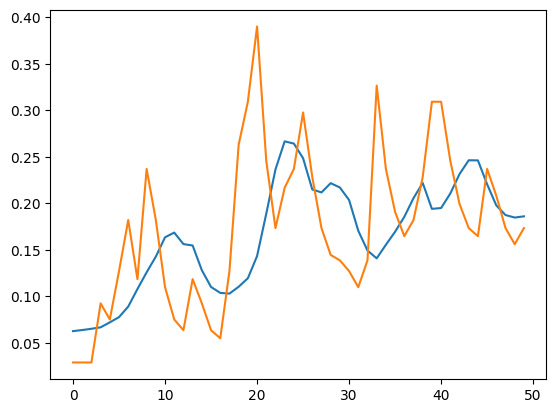

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_predictions[50:100])
plt.plot(y_train[50:100])

In [ ]:
val_predictions = model1.predict(X_val).flatten()

16/16 [==============================] - 0s 3ms/step


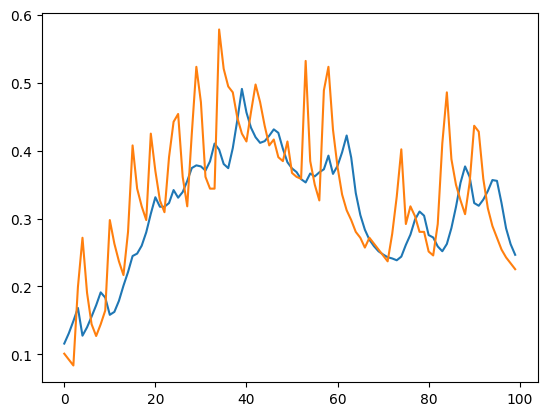

In [ ]:
plt.plot(val_predictions[:100])
plt.plot(y_val[:100])

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  plt.plot(predictions[start:end])
  plt.plot(y_test[start:end])
  return  mse(predictions, y)

8/8 [==============================] - 0s 4ms/step


0.0036969670835554423

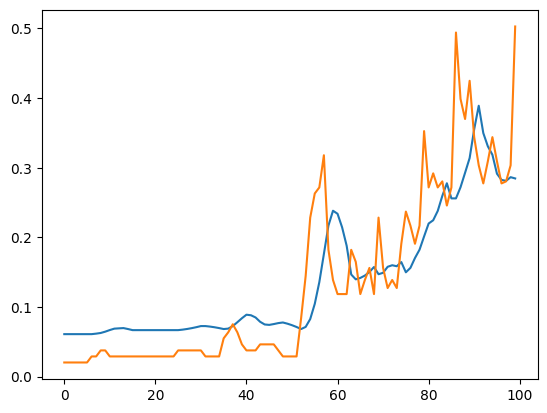

In [ ]:
plot_predictions1(model1, X_test, y_test)

this is giving a pretty satsfactory mse compared to ARIMA(5) our base model; let's try multivariate LSTM to be able to compare which is better

## **Integrating time as a feature**

In [ ]:
bogra_train_df.head(5)

,river_discharge,dew,humidity,precip,precipprob,windspeed_x,cloudcover,visibility,solarenergy,weathercode,apparent_temperature_mean,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration
datetime,,,,,,,,,,,,,,,
2013-02-01,0.011561,0.184426,0.550459,0.0,0.0,0.407563,0.748447,0.307692,0.008811,0.046154,0.238971,0.0,0.0,0.217877,0.243590
2013-02-02,0.011561,0.163934,0.423547,0.0,0.0,0.529412,0.422360,0.384615,0.458150,0.046154,0.272059,0.0,0.0,0.279330,0.527473
2013-02-03,0.011561,0.102459,0.288991,0.0,0.0,0.592437,0.362319,0.897436,0.493392,0.015385,0.268382,0.0,0.0,0.329609,0.560440
2013-02-04,0.011561,0.180328,0.333333,0.0,0.0,0.394958,0.292961,0.641026,0.537445,0.015385,0.312500,0.0,0.0,0.229050,0.490842
2013-02-05,0.011561,0.229508,0.330275,0.0,0.0,0.394958,0.006211,0.897436,0.581498,0.000000,0.341912,0.0,0.0,0.256983,0.547619


In [ ]:
#adding sdeconds collumn
bogra_train_df['Seconds'] = bogra_train_df.index.map(pd.Timestamp.timestamp)
bogra_val_df['Seconds'] = bogra_val_df.index.map(pd.Timestamp.timestamp)
bogra_test_df['Seconds'] = bogra_test_df.index.map(pd.Timestamp.timestamp)

bogra_test_df.head(5)

,river_discharge,dew,humidity,precip,precipprob,windspeed_x,cloudcover,visibility,solarenergy,weathercode,apparent_temperature_mean,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration,Seconds
datetime,,,,,,,,,,,,,,,,
2021-02-25,0.020231,0.381148,0.330275,0.0,0.0,0.331933,0.379917,0.512821,0.621145,0.046154,0.459559,0.0,0.0,0.424581,0.705128,1.614211e+09
2021-02-26,0.020231,0.315574,0.308869,0.0,0.0,0.441176,0.195652,0.307692,0.678414,0.000000,0.488971,0.0,0.0,0.340782,0.705128,1.614298e+09
2021-02-27,0.020231,0.368852,0.389908,0.0,0.0,0.500000,0.143892,0.384615,0.687225,0.015385,0.496324,0.0,0.0,0.575419,0.750916,1.614384e+09
2021-02-28,0.020231,0.364754,0.261468,0.0,0.0,0.483193,0.305383,0.538462,0.713656,0.000000,0.500000,0.0,0.0,0.620112,0.785714,1.614470e+09
2021-03-01,0.020231,0.393443,0.269113,0.0,0.0,0.302521,0.242236,0.512821,0.713656,0.000000,0.481618,0.0,0.0,0.329609,0.787546,1.614557e+09


In [ ]:
day = 60*60*24
year = 365.2425*day

bogra_train_df['Day sin'] = np.sin(bogra_train_df['Seconds'] * (2* np.pi / day))
bogra_train_df['Day cos'] = np.cos(bogra_train_df['Seconds'] * (2 * np.pi / day))
bogra_train_df['Year sin'] = np.sin(bogra_train_df['Seconds'] * (2 * np.pi / year))
bogra_train_df['Year cos'] = np.cos(bogra_train_df['Seconds'] * (2 * np.pi / year))
bogra_train_df = bogra_train_df.drop(columns=['dew', 'humidity', 'precip', 'precipprob', 'windspeed_x', 'cloudcover',
       'visibility', 'solarenergy','weathercode',
       'apparent_temperature_mean', 'rain_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'Seconds'], axis=1)
#bogra_train_df.head()

In [ ]:

bogra_val_df['Day sin'] = np.sin(bogra_val_df['Seconds'] * (2* np.pi / day))
bogra_val_df['Day cos'] = np.cos(bogra_val_df['Seconds'] * (2 * np.pi / day))
bogra_val_df['Year sin'] = np.sin(bogra_val_df['Seconds'] * (2 * np.pi / year))
bogra_val_df['Year cos'] = np.cos(bogra_val_df['Seconds'] * (2 * np.pi / year))
bogra_val_df = bogra_val_df.drop(columns=['dew', 'humidity', 'precip', 'precipprob', 'windspeed_x', 'cloudcover',
       'visibility', 'solarenergy','weathercode',
       'apparent_temperature_mean', 'rain_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'Seconds'], axis=1)
#bogra_val_df.head()

In [ ]:

bogra_test_df['Day sin'] = np.sin(bogra_test_df['Seconds'] * (2* np.pi / day))
bogra_test_df['Day cos'] = np.cos(bogra_test_df['Seconds'] * (2 * np.pi / day))
bogra_test_df['Year sin'] = np.sin(bogra_test_df['Seconds'] * (2 * np.pi / year))
bogra_test_df['Year cos'] = np.cos(bogra_test_df['Seconds'] * (2 * np.pi / year))
bogra_test_df = bogra_test_df.drop(columns=['dew', 'humidity', 'precip', 'precipprob', 'windspeed_x', 'cloudcover',
       'visibility', 'solarenergy','weathercode',
       'apparent_temperature_mean', 'rain_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'Seconds'], axis=1)
#bogra_test_df.head()

In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2_train, y2_train = df_to_X_y2(bogra_train_df)
X2_train.shape, y2_train.shape

((1716, 6, 5), (1716,))

In [ ]:
bogra_train_df.head()

,river_discharge,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
2013-02-01,0.011561,-5.751602e-12,1.0,0.516822,0.856093
2013-02-02,0.011561,-1.453064e-12,1.0,0.531472,0.847076
2013-02-03,0.011561,-1.170644e-11,1.0,0.545965,0.837808
2013-02-04,0.011561,-7.407902e-12,1.0,0.560296,0.828293
2013-02-05,0.011561,-3.109363e-12,1.0,0.574461,0.818532


In [ ]:
X2_val, y2_val = df_to_X_y2(bogra_val_df)
X2_val.shape, y2_val.shape

((486, 6, 5), (486,))

In [ ]:
X2_test, y2_test = df_to_X_y2(bogra_test_df)
X2_test.shape, y2_test.shape

((240, 6, 5), (240,))

In [ ]:
model2 = Sequential()
model2.add(InputLayer((6, 5)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                17920     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=20, callbacks=[cp2])

Epoch 1/20
54/54 [==============================] - 9s 99ms/step - loss: 0.0106 - root_mean_squared_error: 0.1029 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0819
Epoch 2/20
54/54 [==============================] - 4s 77ms/step - loss: 0.0074 - root_mean_squared_error: 0.0859 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0796
Epoch 3/20
54/54 [==============================] - 6s 113ms/step - loss: 0.0066 - root_mean_squared_error: 0.0813 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0783
Epoch 4/20
54/54 [==============================] - 4s 81ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0737
Epoch 5/20
54/54 [==============================] - 4s 77ms/step - loss: 0.0053 - root_mean_squared_error: 0.0728 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 6/20
54/54 [==============================] - 6s 104ms/step - loss: 0.0047 - root_mean_squared_error: 0.0685 - val_loss: 0.0045 - val_root

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

8/8 [==============================] - 0s 3ms/step


(     Predictions   Actuals
 0       0.023061  0.020231
 1       0.023494  0.020231
 2       0.023935  0.020231
 3       0.024386  0.020231
 4       0.024846  0.020231
 ..           ...       ...
 235     0.020461  0.014451
 236     0.019982  0.020231
 237     0.020317  0.020231
 238     0.020621  0.020231
 239     0.020910  0.020231
 
 [240 rows x 2 columns],
 0.0023672655226447755)

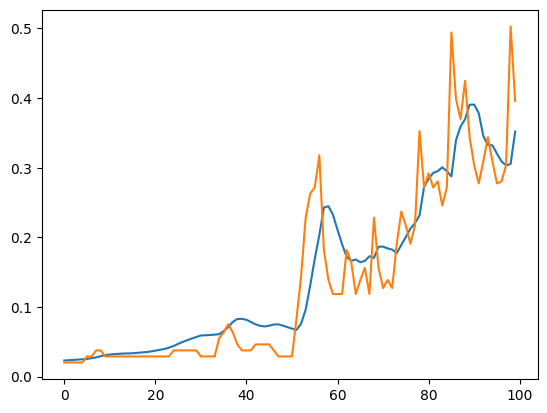

In [ ]:
plot_predictions(model2, X2_test, y2_test)

When We added the time as a feature it slighltly improved the rmse from 0.003 to 0.002 so we keep it I Guess!

## **Trying multivariate model**

In [ ]:
bogra_train_df = pd.read_csv("data/bogra_train.csv")
bogra_train_df['datetime'] = pd.to_datetime(bogra_train_df['datetime'])
bogra_train_df.set_index('datetime', inplace=True)

bogra_val_df= pd.read_csv("data/bogra_val.csv")
bogra_val_df['datetime'] = pd.to_datetime(bogra_val_df['datetime'])
bogra_val_df.set_index('datetime', inplace=True)

bogra_test_df = pd.read_csv("data/bogra_test.csv")
bogra_test_df['datetime'] = pd.to_datetime(bogra_test_df['datetime'])
bogra_test_df.set_index('datetime', inplace=True)

In [ ]:
#adding sdeconds collumn
bogra_train_df['Seconds'] = bogra_train_df.index.map(pd.Timestamp.timestamp)
bogra_val_df['Seconds'] = bogra_val_df.index.map(pd.Timestamp.timestamp)
bogra_test_df['Seconds'] = bogra_test_df.index.map(pd.Timestamp.timestamp)

bogra_test_df.head(5)

,dew,humidity,precip,precipprob,windspeed_x,cloudcover,visibility,solarenergy,river_discharge,weathercode,apparent_temperature_mean,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration,Seconds
datetime,,,,,,,,,,,,,,,,
2021-02-25,0.381148,0.330275,0.0,0.0,0.331933,0.379917,0.512821,0.621145,0.020231,0.046154,0.459559,0.0,0.0,0.424581,0.705128,1.614211e+09
2021-02-26,0.315574,0.308869,0.0,0.0,0.441176,0.195652,0.307692,0.678414,0.020231,0.000000,0.488971,0.0,0.0,0.340782,0.705128,1.614298e+09
2021-02-27,0.368852,0.389908,0.0,0.0,0.500000,0.143892,0.384615,0.687225,0.020231,0.015385,0.496324,0.0,0.0,0.575419,0.750916,1.614384e+09
2021-02-28,0.364754,0.261468,0.0,0.0,0.483193,0.305383,0.538462,0.713656,0.020231,0.000000,0.500000,0.0,0.0,0.620112,0.785714,1.614470e+09
2021-03-01,0.393443,0.269113,0.0,0.0,0.302521,0.242236,0.512821,0.713656,0.020231,0.000000,0.481618,0.0,0.0,0.329609,0.787546,1.614557e+09


In [ ]:
day = 60*60*24
year = 365.2425*day

bogra_train_df['Day sin'] = np.sin(bogra_train_df['Seconds'] * (2* np.pi / day))
bogra_train_df['Day cos'] = np.cos(bogra_train_df['Seconds'] * (2 * np.pi / day))
bogra_train_df['Year sin'] = np.sin(bogra_train_df['Seconds'] * (2 * np.pi / year))
bogra_train_df['Year cos'] = np.cos(bogra_train_df['Seconds'] * (2 * np.pi / year))
bogra_train_df = bogra_train_df.drop(columns=['dew', 'humidity', 'precip', 'precipprob', 'windspeed_x', 'cloudcover',
       'visibility', 'solarenergy','weathercode',
       'apparent_temperature_mean', 'rain_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'Seconds'], axis=1)
#bogra_train_df.head()

In [ ]:

bogra_val_df['Day sin'] = np.sin(bogra_val_df['Seconds'] * (2* np.pi / day))
bogra_val_df['Day cos'] = np.cos(bogra_val_df['Seconds'] * (2 * np.pi / day))
bogra_val_df['Year sin'] = np.sin(bogra_val_df['Seconds'] * (2 * np.pi / year))
bogra_val_df['Year cos'] = np.cos(bogra_val_df['Seconds'] * (2 * np.pi / year))
bogra_val_df = bogra_val_df.drop(columns=['dew', 'humidity', 'precip', 'precipprob', 'windspeed_x', 'cloudcover',
       'visibility', 'solarenergy','weathercode',
       'apparent_temperature_mean', 'rain_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'Seconds'], axis=1)
#bogra_val_df.head()

In [ ]:

bogra_test_df['Day sin'] = np.sin(bogra_test_df['Seconds'] * (2* np.pi / day))
bogra_test_df['Day cos'] = np.cos(bogra_test_df['Seconds'] * (2 * np.pi / day))
bogra_test_df['Year sin'] = np.sin(bogra_test_df['Seconds'] * (2 * np.pi / year))
bogra_test_df['Year cos'] = np.cos(bogra_test_df['Seconds'] * (2 * np.pi / year))
bogra_test_df = bogra_test_df.drop(columns=['dew', 'humidity', 'precip', 'precipprob', 'windspeed_x', 'cloudcover',
       'visibility', 'solarenergy','weathercode',
       'apparent_temperature_mean', 'rain_sum', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'Seconds'], axis=1)
#bogra_test_df.head()

In [ ]:
def df_to_X_y3(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3_train, y3_train = df_to_X_y3(bogra_train_df)
X3_train.shape, y3_train.shape

((1716, 6, 5), (1716,))

In [ ]:
bogra_train_df.head()

,river_discharge,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
2013-02-01,0.011561,-5.751602e-12,1.0,0.516822,0.856093
2013-02-02,0.011561,-1.453064e-12,1.0,0.531472,0.847076
2013-02-03,0.011561,-1.170644e-11,1.0,0.545965,0.837808
2013-02-04,0.011561,-7.407902e-12,1.0,0.560296,0.828293
2013-02-05,0.011561,-3.109363e-12,1.0,0.574461,0.818532


In [ ]:
X3_val, y3_val = df_to_X_y3(bogra_val_df)
X3_val.shape, y3_val.shape

((486, 6, 5), (486,))

In [ ]:
X3_test, y3_test = df_to_X_y3(bogra_test_df)
X3_test.shape, y3_test.shape

((240, 6, 5), (240,))

In [ ]:
column_name='river_discharge'
bogra_train_df = bogra_train_df[[column_name] + [col for col in bogra_train_df.columns if col != column_name]]
bogra_val_df = bogra_val_df[[column_name] + [col for col in bogra_val_df.columns if col != column_name]]
bogra_test_df = bogra_test_df[[column_name] + [col for col in bogra_test_df.columns if col != column_name]]

In [ ]:
bogra_test_df.columns

Index(['river_discharge', 'Day sin', 'Day cos', 'Year sin', 'Year cos'], dtype='object')

In [ ]:
model3 = Sequential()
model3.add(InputLayer((6, 5)))
model3.add(LSTM(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 64)                17920     
                                                                 
 dense_36 (Dense)            (None, 8)                 520       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp3])

Epoch 1/50
54/54 [==============================] - 8s 90ms/step - loss: 0.0325 - root_mean_squared_error: 0.1802 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1452
Epoch 2/50
54/54 [==============================] - 8s 153ms/step - loss: 0.0133 - root_mean_squared_error: 0.1152 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 3/50
54/54 [==============================] - 4s 77ms/step - loss: 0.0102 - root_mean_squared_error: 0.1009 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0919
Epoch 4/50
54/54 [==============================] - 5s 87ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0872
Epoch 5/50
54/54 [==============================] - 9s 165ms/step - loss: 0.0086 - root_mean_squared_error: 0.0930 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0827
Epoch 6/50
54/54 [==============================] - 4s 78ms/step - loss: 0.0080 - root_mean_squared_error: 0.0894 - val_loss: 0.0065 - val_root

8/8 [==============================] - 1s 4ms/step


(     Predictions   Actuals
 0       0.021080  0.020231
 1       0.021106  0.020231
 2       0.021127  0.020231
 3       0.021143  0.020231
 4       0.021154  0.020231
 ..           ...       ...
 235     0.014790  0.014451
 236     0.014760  0.020231
 237     0.014984  0.020231
 238     0.015205  0.020231
 239     0.015416  0.020231
 
 [240 rows x 2 columns],
 0.002391925463498257)

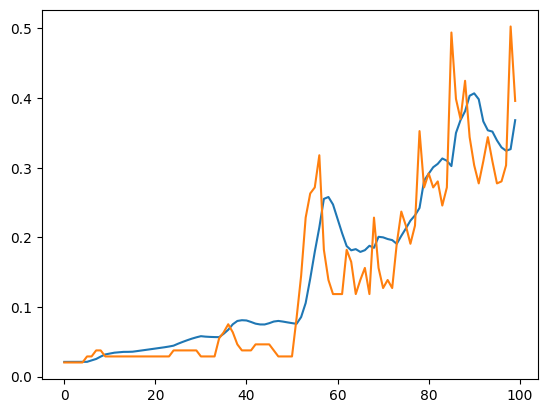

In [ ]:
plot_predictions(model3, X3_test, y3_test)

In [ ]:
model3.save("lstm_bogra_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Leveraging the other columns didn't add additional gain in terms of rmse so we will just go with the time columns and the river discharge collumn

## **Predicting 3 var rain_sum precip and river discharge**

In [313]:
bogra_train_df = pd.read_csv("data/bogra_train.csv")
bogra_train_df['datetime'] = pd.to_datetime(bogra_train_df['datetime'])
bogra_train_df.set_index('datetime', inplace=True)

bogra_val_df= pd.read_csv("data/bogra_val.csv")
bogra_val_df['datetime'] = pd.to_datetime(bogra_val_df['datetime'])
bogra_val_df.set_index('datetime', inplace=True)

bogra_test_df = pd.read_csv("data/bogra_test.csv")
bogra_test_df['datetime'] = pd.to_datetime(bogra_test_df['datetime'])
bogra_test_df.set_index('datetime', inplace=True)

In [314]:
#adding sdeconds collumn
bogra_train_df['Seconds'] = bogra_train_df.index.map(pd.Timestamp.timestamp)
bogra_val_df['Seconds'] = bogra_val_df.index.map(pd.Timestamp.timestamp)
bogra_test_df['Seconds'] = bogra_test_df.index.map(pd.Timestamp.timestamp)

bogra_test_df.head(5)

,dew,humidity,precip,precipprob,windspeed_x,cloudcover,visibility,solarenergy,river_discharge,weathercode,apparent_temperature_mean,rain_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration,Seconds
datetime,,,,,,,,,,,,,,,,
2021-02-25,0.381148,0.330275,0.0,0.0,0.331933,0.379917,0.512821,0.621145,0.020231,0.046154,0.459559,0.0,0.0,0.424581,0.705128,1.614211e+09
2021-02-26,0.315574,0.308869,0.0,0.0,0.441176,0.195652,0.307692,0.678414,0.020231,0.000000,0.488971,0.0,0.0,0.340782,0.705128,1.614298e+09
2021-02-27,0.368852,0.389908,0.0,0.0,0.500000,0.143892,0.384615,0.687225,0.020231,0.015385,0.496324,0.0,0.0,0.575419,0.750916,1.614384e+09
2021-02-28,0.364754,0.261468,0.0,0.0,0.483193,0.305383,0.538462,0.713656,0.020231,0.000000,0.500000,0.0,0.0,0.620112,0.785714,1.614470e+09
2021-03-01,0.393443,0.269113,0.0,0.0,0.302521,0.242236,0.512821,0.713656,0.020231,0.000000,0.481618,0.0,0.0,0.329609,0.787546,1.614557e+09


In [315]:
day = 60*60*24
year = 365.2425*day

bogra_train_df['Day sin'] = np.sin(bogra_train_df['Seconds'] * (2* np.pi / day))
bogra_train_df['Day cos'] = np.cos(bogra_train_df['Seconds'] * (2 * np.pi / day))
bogra_train_df['Year sin'] = np.sin(bogra_train_df['Seconds'] * (2 * np.pi / year))
bogra_train_df['Year cos'] = np.cos(bogra_train_df['Seconds'] * (2 * np.pi / year))
bogra_train_df = bogra_train_df.drop(columns=['dew', 'humidity', 'precipprob', 'windspeed_x', 'cloudcover',
       'visibility', 'solarenergy','weathercode',
       'apparent_temperature_mean','precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'Seconds'], axis=1)
#bogra_train_df.head()

In [316]:

bogra_val_df['Day sin'] = np.sin(bogra_val_df['Seconds'] * (2* np.pi / day))
bogra_val_df['Day cos'] = np.cos(bogra_val_df['Seconds'] * (2 * np.pi / day))
bogra_val_df['Year sin'] = np.sin(bogra_val_df['Seconds'] * (2 * np.pi / year))
bogra_val_df['Year cos'] = np.cos(bogra_val_df['Seconds'] * (2 * np.pi / year))
bogra_val_df = bogra_val_df.drop(columns=['dew', 'humidity','precipprob', 'windspeed_x', 'cloudcover',
       'visibility', 'solarenergy','weathercode',
       'apparent_temperature_mean','precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'Seconds'], axis=1)
#bogra_val_df.head()

In [317]:

bogra_test_df['Day sin'] = np.sin(bogra_test_df['Seconds'] * (2* np.pi / day))
bogra_test_df['Day cos'] = np.cos(bogra_test_df['Seconds'] * (2 * np.pi / day))
bogra_test_df['Year sin'] = np.sin(bogra_test_df['Seconds'] * (2 * np.pi / year))
bogra_test_df['Year cos'] = np.cos(bogra_test_df['Seconds'] * (2 * np.pi / year))
bogra_test_df = bogra_test_df.drop(columns=['dew', 'humidity','precipprob', 'windspeed_x', 'cloudcover',
       'visibility', 'solarenergy','weathercode',
       'apparent_temperature_mean', 'precipitation_hours',
       'windspeed_y', 'et0_fao_evapotranspiration', 'Seconds'], axis=1)
#bogra_test_df.head()

In [318]:
def df_to_X_y3(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1],df_as_np[i+window_size][2]]
    y.append(label)
  return np.array(X), np.array(y)

In [319]:
column_name='river_discharge'
bogra_train_df = bogra_train_df[[column_name] + [col for col in bogra_train_df.columns if col != column_name]]
bogra_val_df = bogra_val_df[[column_name] + [col for col in bogra_val_df.columns if col != column_name]]
bogra_test_df = bogra_test_df[[column_name] + [col for col in bogra_test_df.columns if col != column_name]]

In [320]:
column_name='precip'
bogra_train_df = bogra_train_df[[column_name] + [col for col in bogra_train_df.columns if col != column_name]]
bogra_val_df = bogra_val_df[[column_name] + [col for col in bogra_val_df.columns if col != column_name]]
bogra_test_df = bogra_test_df[[column_name] + [col for col in bogra_test_df.columns if col != column_name]]

In [321]:
column_name='rain_sum'
bogra_train_df = bogra_train_df[[column_name] + [col for col in bogra_train_df.columns if col != column_name]]
bogra_val_df = bogra_val_df[[column_name] + [col for col in bogra_val_df.columns if col != column_name]]
bogra_test_df = bogra_test_df[[column_name] + [col for col in bogra_test_df.columns if col != column_name]]

In [322]:
X4_train, y4_train = df_to_X_y3(bogra_train_df)
X4_train.shape, y4_train.shape

((1716, 6, 7), (1716, 3))

In [323]:
X4_val, y4_val = df_to_X_y3(bogra_val_df)
X4_val.shape, y4_val.shape

((486, 6, 7), (486, 3))

In [324]:
X4_test, y4_test = df_to_X_y3(bogra_test_df)
X4_test.shape, y4_test.shape

((240, 6, 7), (240, 3))

In [325]:
bogra_test_df.columns

Index(['rain_sum', 'precip', 'river_discharge', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

In [343]:
train_df = bogra_test_df
val_df = bogra_val_df
test_df = bogra_test_df


In [344]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels


    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

In [352]:
def compile_and_fit(model, window, patience=30, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')

    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])

    history = model.fit(window.train,
                       epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[early_stopping])

    return history

In [361]:
mo_wide_window = DataWindow(input_width=14, label_width=14, shift=1, label_columns=['precip','rain_sum','river_discharge'])

In [363]:
mo_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(units = 3)
])

history = compile_and_fit(mo_lstm_model, mo_wide_window)

Epoch 1/50
8/8 [==============================] - 4s 108ms/step - loss: 0.0639 - mean_absolute_error: 0.1877 - val_loss: 0.0466 - val_mean_absolute_error: 0.1549
Epoch 2/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0403 - mean_absolute_error: 0.1428 - val_loss: 0.0375 - val_mean_absolute_error: 0.1380
Epoch 3/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0364 - mean_absolute_error: 0.1358 - val_loss: 0.0358 - val_mean_absolute_error: 0.1275
Epoch 4/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0335 - mean_absolute_error: 0.1230 - val_loss: 0.0354 - val_mean_absolute_error: 0.1254
Epoch 5/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0323 - mean_absolute_error: 0.1171 - val_loss: 0.0344 - val_mean_absolute_error: 0.1212
Epoch 6/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0316 - mean_absolute_error: 0.1142 - val_loss: 0.0330 - val_mean_absolute_error: 0.1161
Epoch 7/50
8/8 [=================

In [364]:
mo_lstm_model.save("lstm_bogra_mod.h5")